In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df = pd.read_csv('twitter_data/data/tweets_atlanta_hawks.csv')

In [6]:
import ast
import json
def get_data(df): #split the dictionary into four columns
    df['base_sentiment_score'] = df['base_sentiment_score'].apply(ast.literal_eval)

    df['neg'] = df['base_sentiment_score'].apply(lambda x: x['neg'])
    df['neu'] = df['base_sentiment_score'].apply(lambda x: x['neu'])
    df['pos'] = df['base_sentiment_score'].apply(lambda x: x['pos'])
    df['compound'] = df['base_sentiment_score'].apply(lambda x: x['compound'])
    return df


In [19]:
def plot_combined_averages(df, name):
    means = df[['neg', 'neu', 'pos', 'compound']].mean()

    means_df = means.reset_index()
    means_df.columns = ['Metric', 'Average']

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Metric', y='Average', data=means_df)

    plt.title('Average Values of Sentiment Metrics of Tweets about '+name)
    plt.xlabel('Metric')
    plt.ylabel('Average Value')

    # Show the plot
    plt.savefig('twitter_data/figures/average_sentiment_'+name+'.png')

c:\Users\jaden\anaconda3\envs\nba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaden\anaconda3\envs\nba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaden\anaconda3\envs\nba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaden\anaconda3\envs\nba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

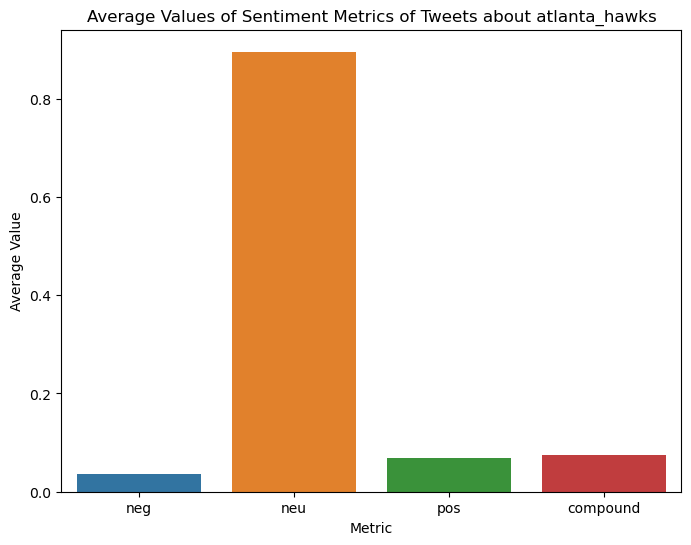

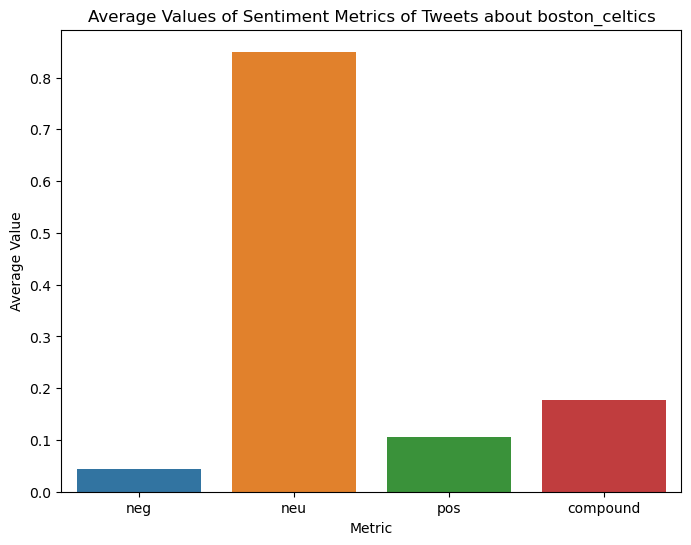

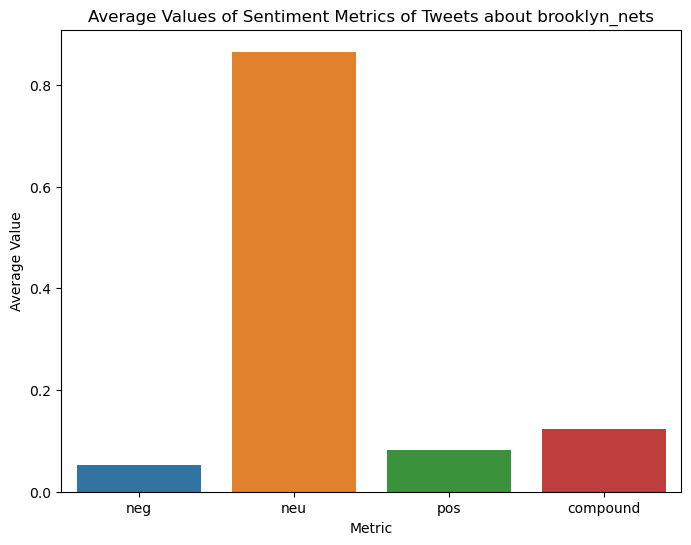

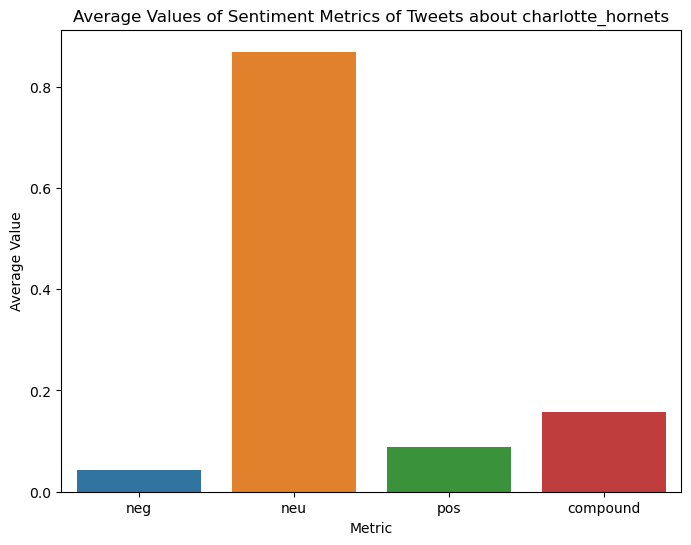

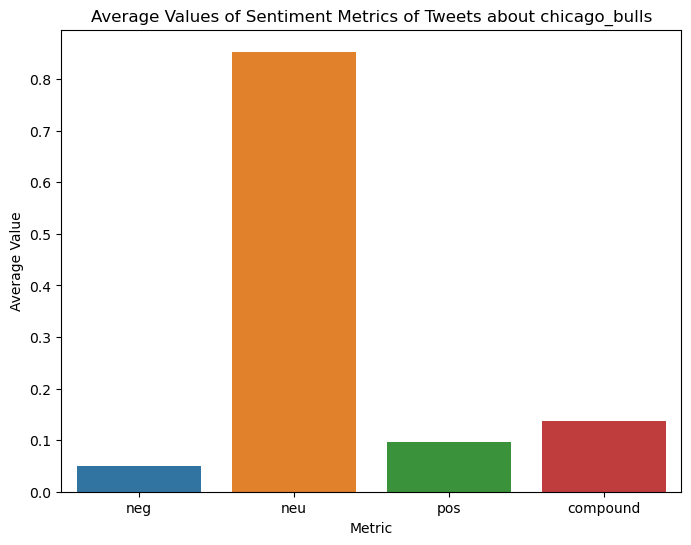

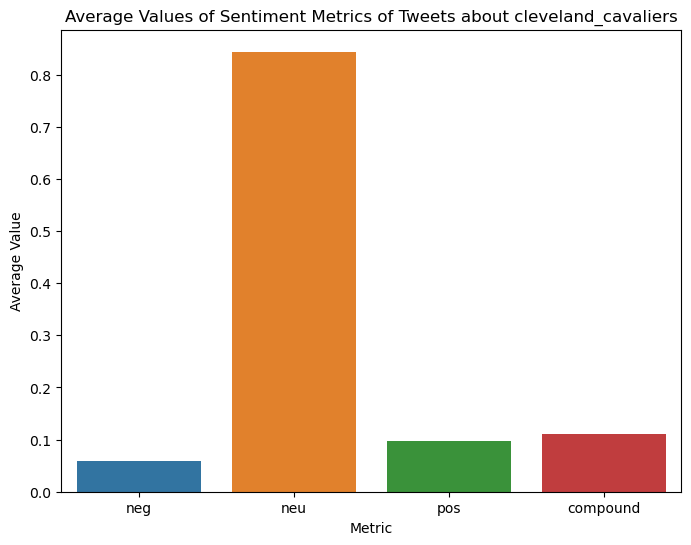

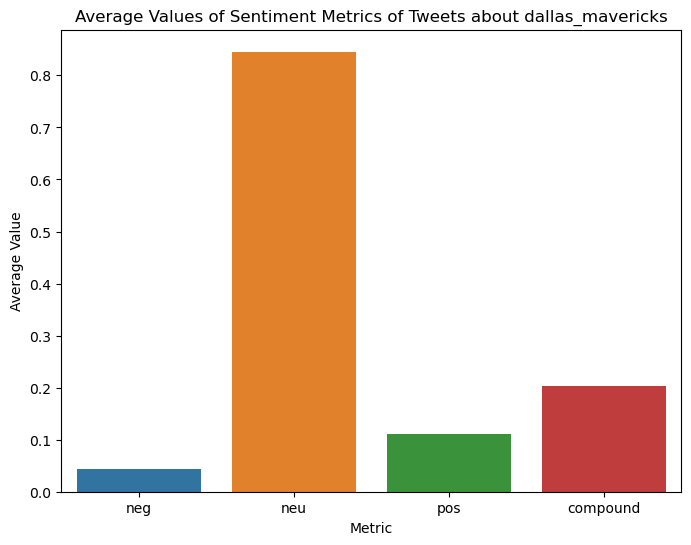

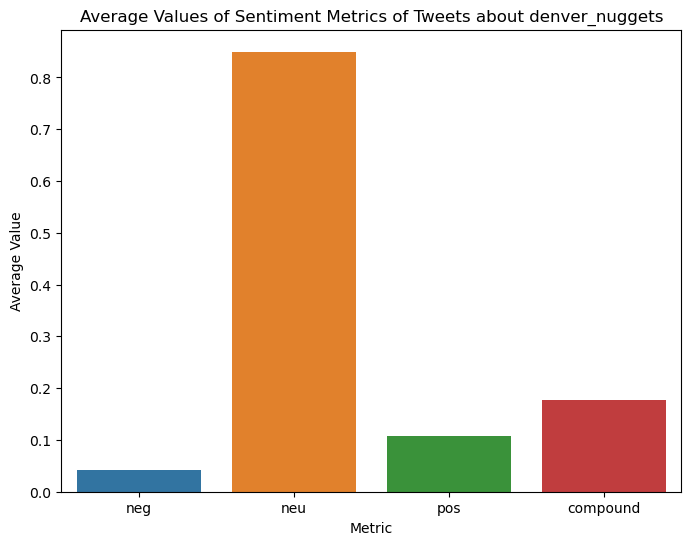

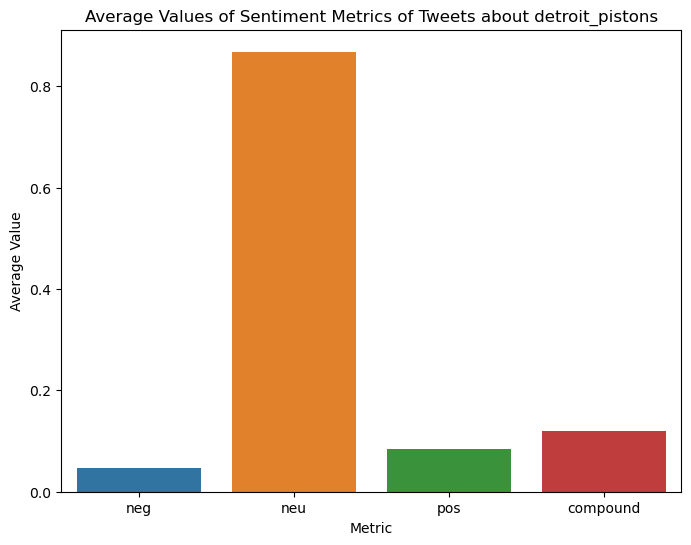

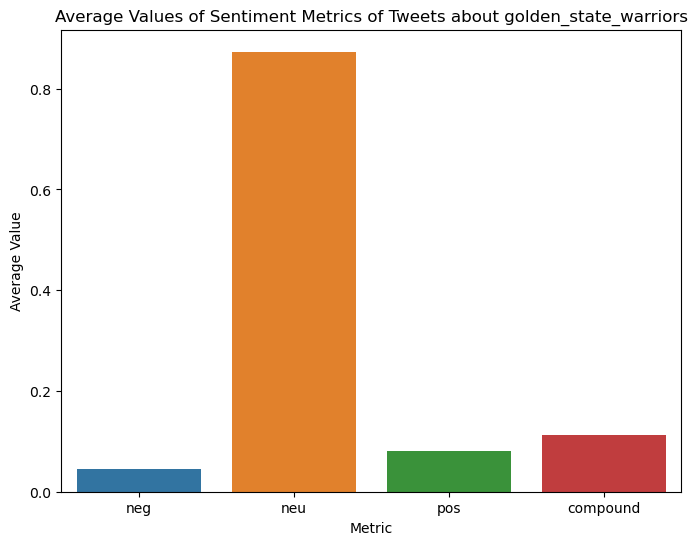

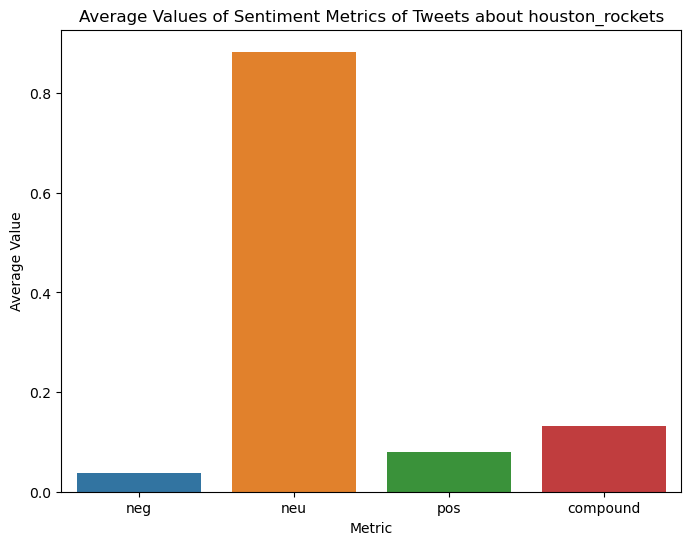

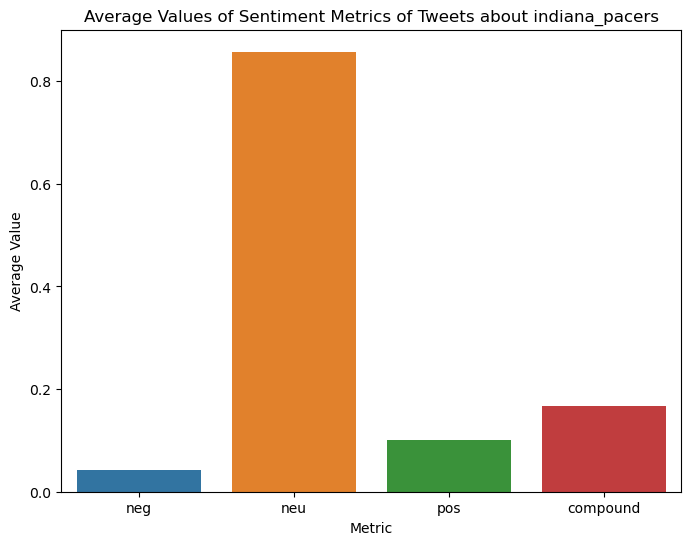

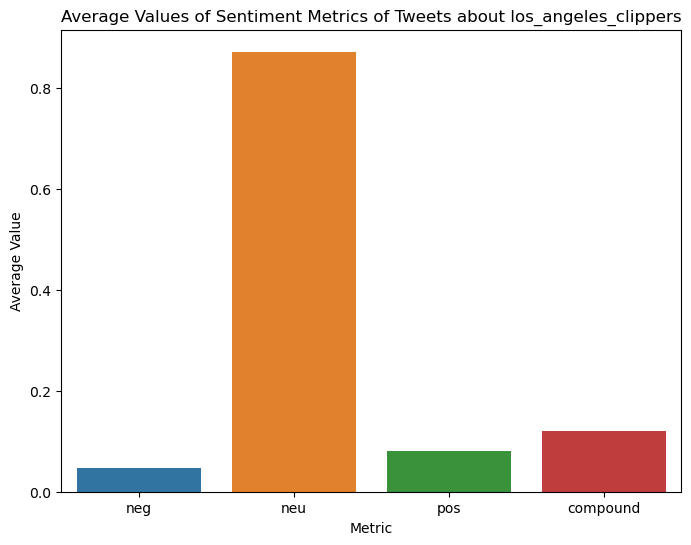

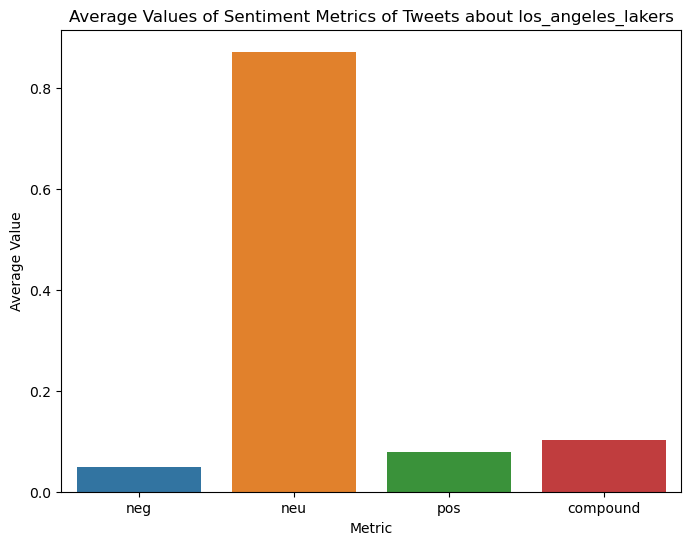

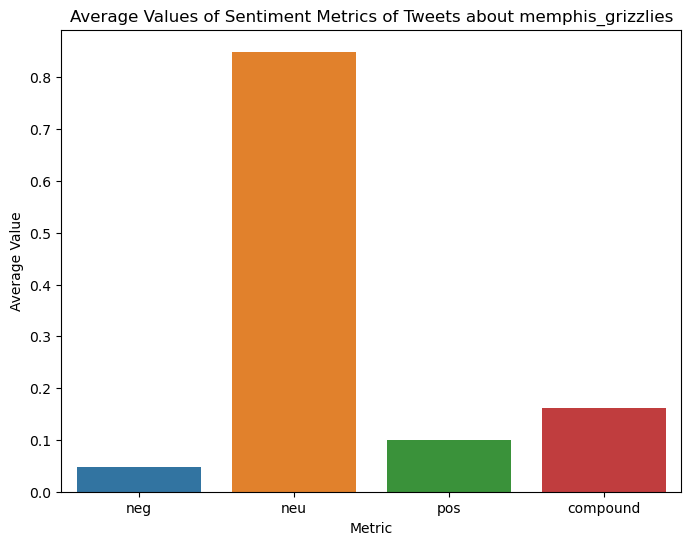

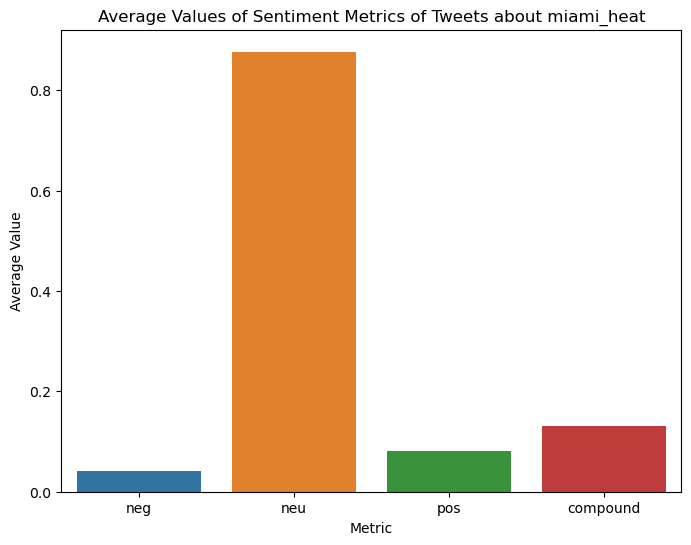

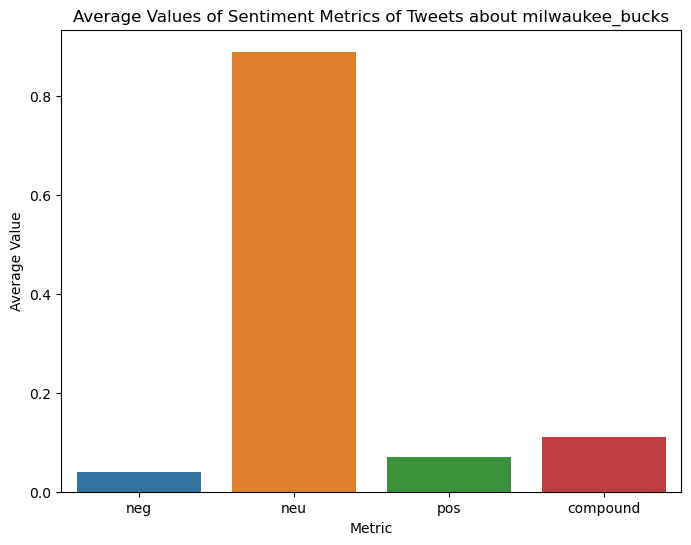

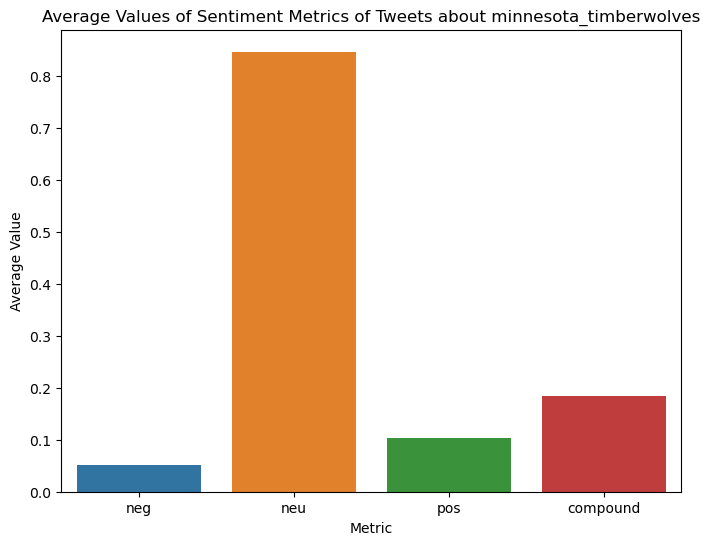

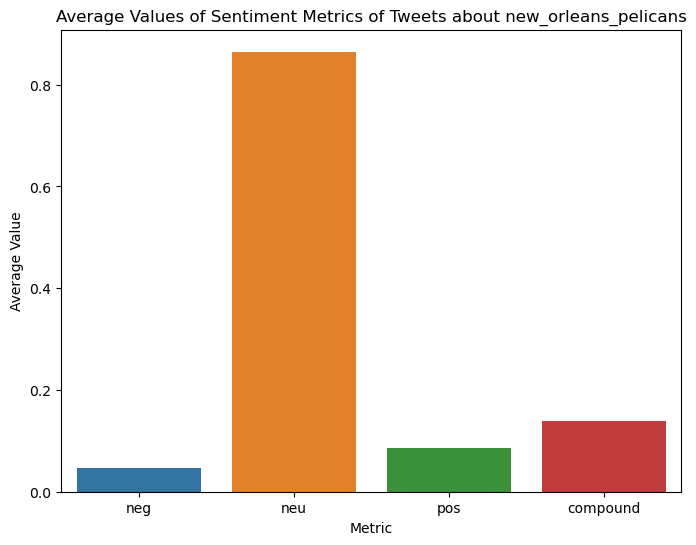

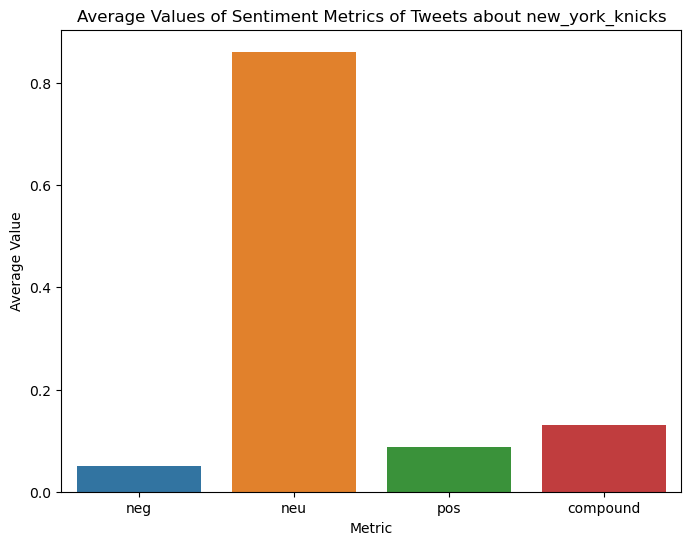

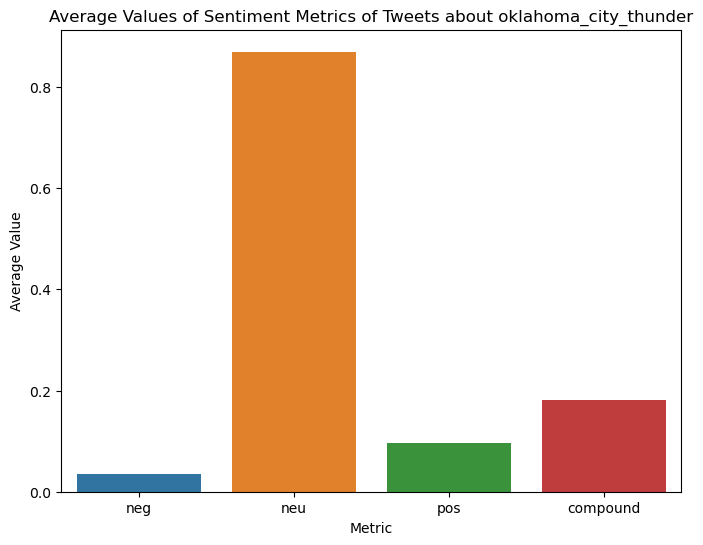

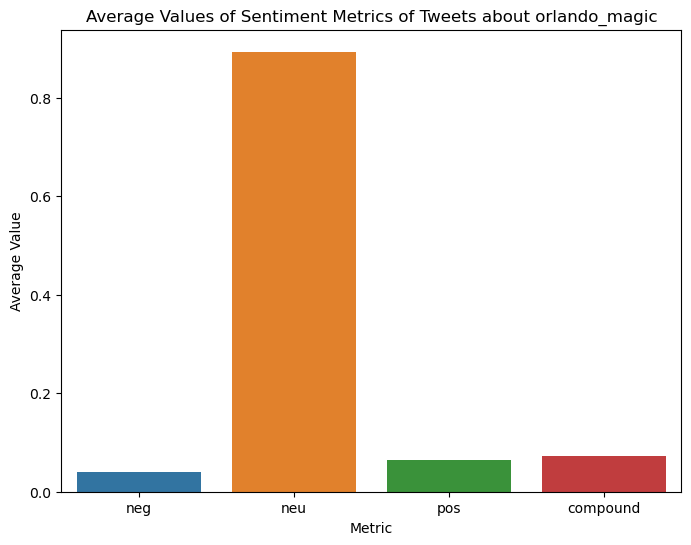

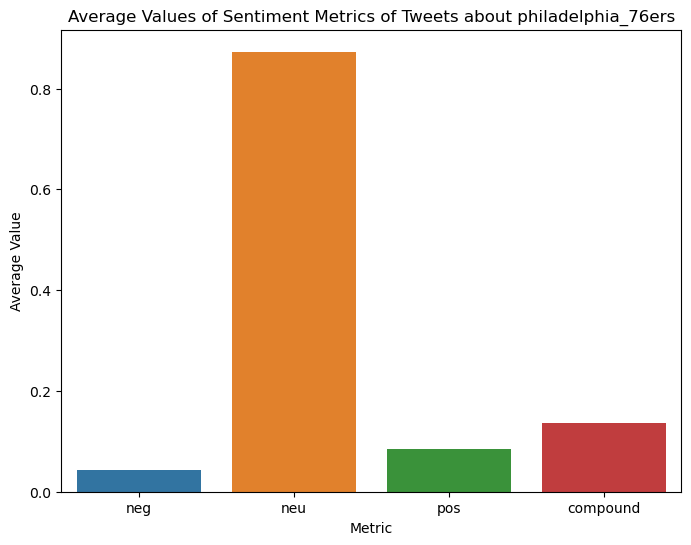

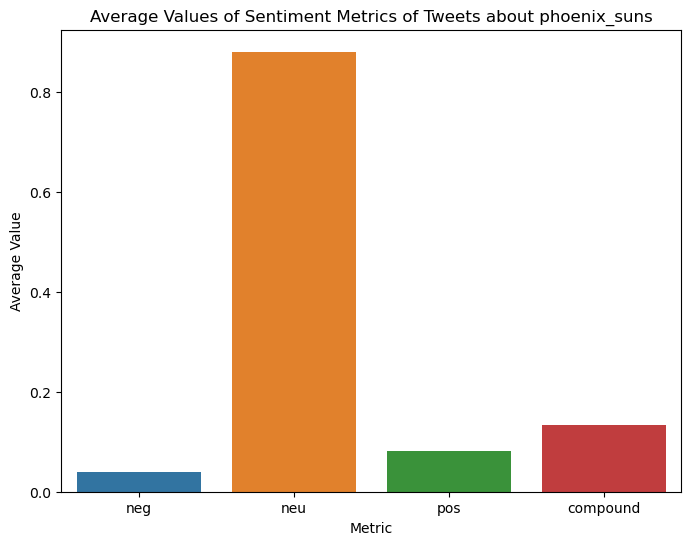

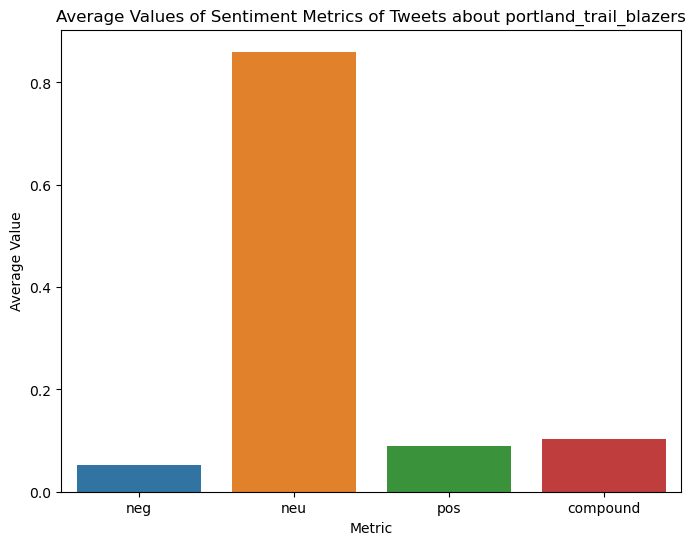

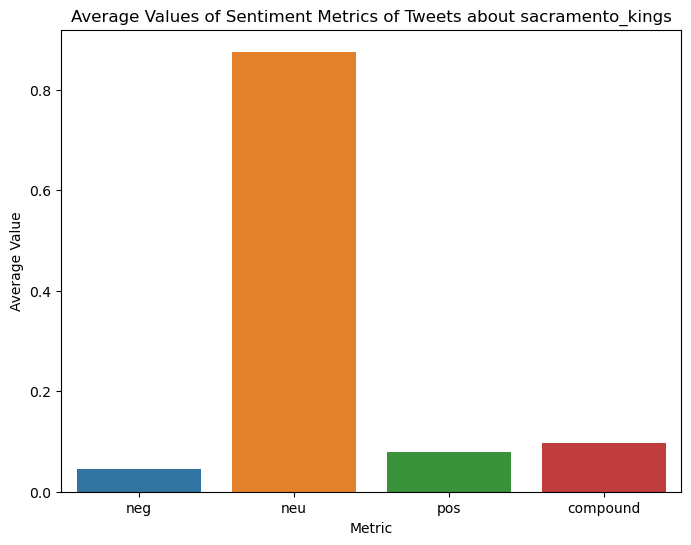

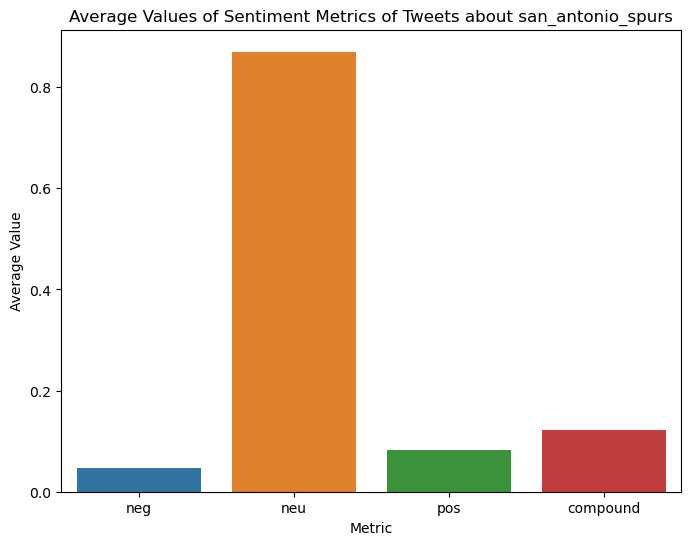

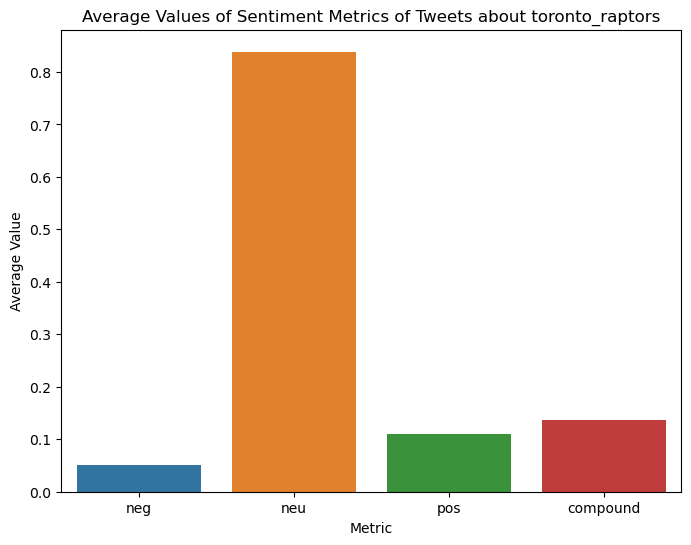

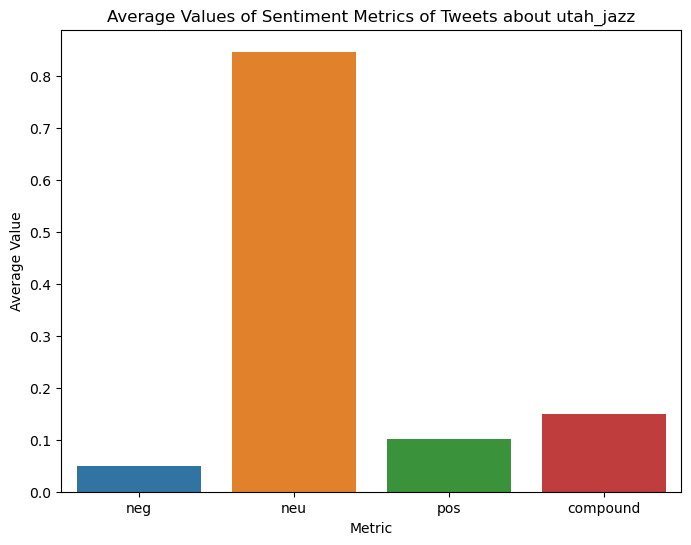

In [20]:
import os
import glob
data_path = 'twitter_data/data/*.csv'  

for file in glob.glob(data_path):
    filename = os.path.basename(file)
    df = pd.read_csv(file)
    df = get_data(df)
    name = filename.split('_')[1:]
    name = '_'.join(name)
    name = ''.join(name.split('.csv')[0])
    plot_combined_averages(df, name)

c:\Users\jaden\anaconda3\envs\nba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaden\anaconda3\envs\nba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaden\anaconda3\envs\nba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


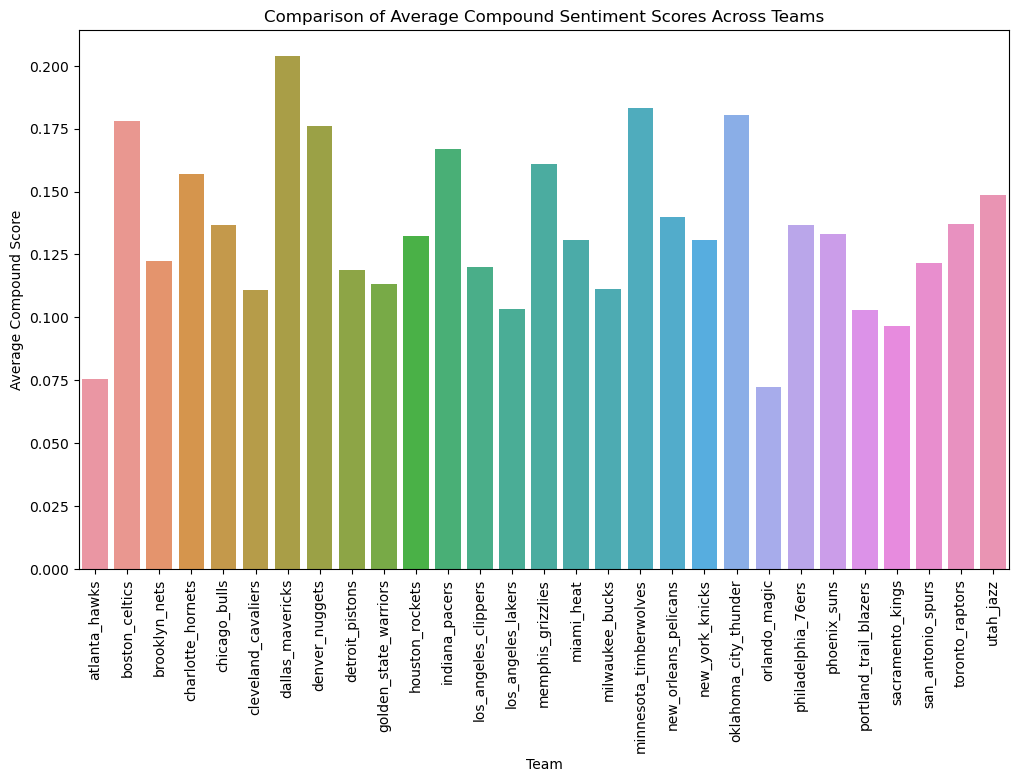

In [33]:
compound_averages = {}
for file in glob.glob(data_path):
    filename = os.path.basename(file)
    df = pd.read_csv(file)
    df = get_data(df)
    name = filename.split('_')[1:]
    name = '_'.join(name)
    name = ''.join(name.split('.csv')[0])
    compound_averages[name] = df['compound'].mean()
averages_df = pd.DataFrame(list(compound_averages.items()), columns=['Team', 'Average Compound'])
plt.figure(figsize=(12, 7))
sns.barplot(x='Team', y='Average Compound', data=averages_df)

plt.xticks(rotation=90)  # Rotate labels if there are many files
plt.title('Comparison of Average Compound Sentiment Scores Across Teams')
plt.xlabel('Team')
plt.ylabel('Average Compound Score')

plt.savefig('twitter_data/figures/average_compound_scores_across_teams.png')

c:\Users\jaden\anaconda3\envs\nba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaden\anaconda3\envs\nba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaden\anaconda3\envs\nba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


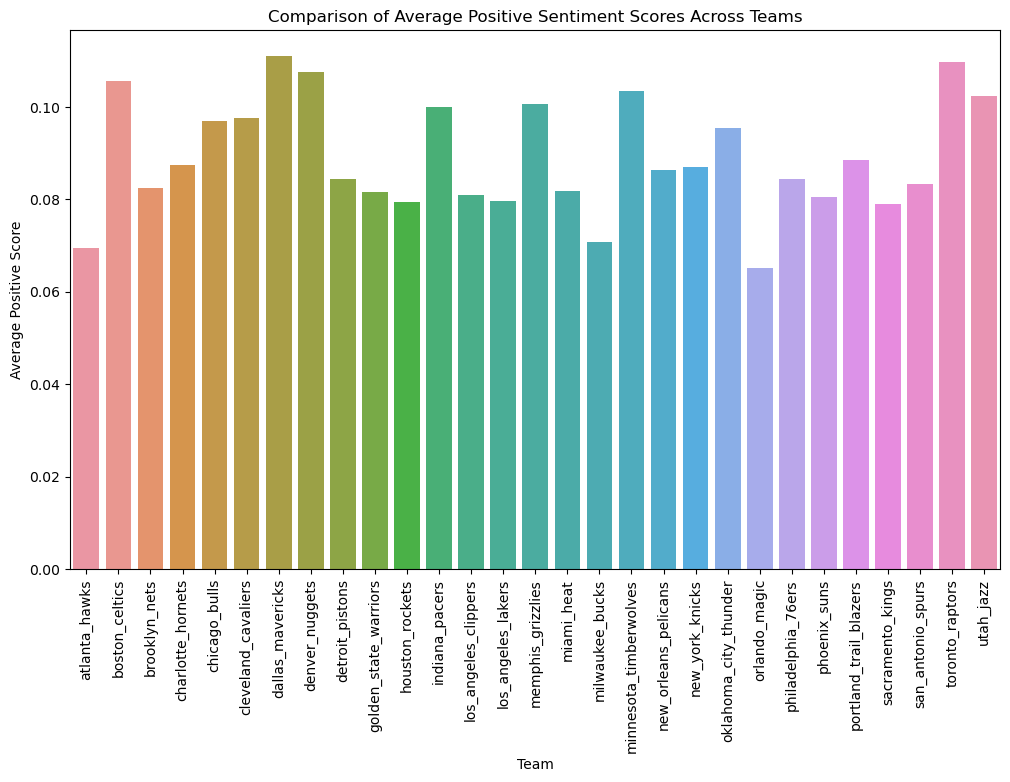

In [34]:
pos_averages = {}
for file in glob.glob(data_path):
    filename = os.path.basename(file)
    df = pd.read_csv(file)
    df = get_data(df)
    name = filename.split('_')[1:]
    name = '_'.join(name)
    name = ''.join(name.split('.csv')[0])
    pos_averages[name] = df['pos'].mean()
averages_df = pd.DataFrame(list(pos_averages.items()), columns=['Team', 'Average Pos'])
plt.figure(figsize=(12, 7))
sns.barplot(x='Team', y='Average Pos', data=averages_df)

plt.xticks(rotation=90)  # Rotate labels if there are many files
plt.title('Comparison of Average Positive Sentiment Scores Across Teams')
plt.xlabel('Team')
plt.ylabel('Average Positive Score')

plt.savefig('twitter_data/figures/average_positive_scores_across_teams.png')

c:\Users\jaden\anaconda3\envs\nba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaden\anaconda3\envs\nba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaden\anaconda3\envs\nba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


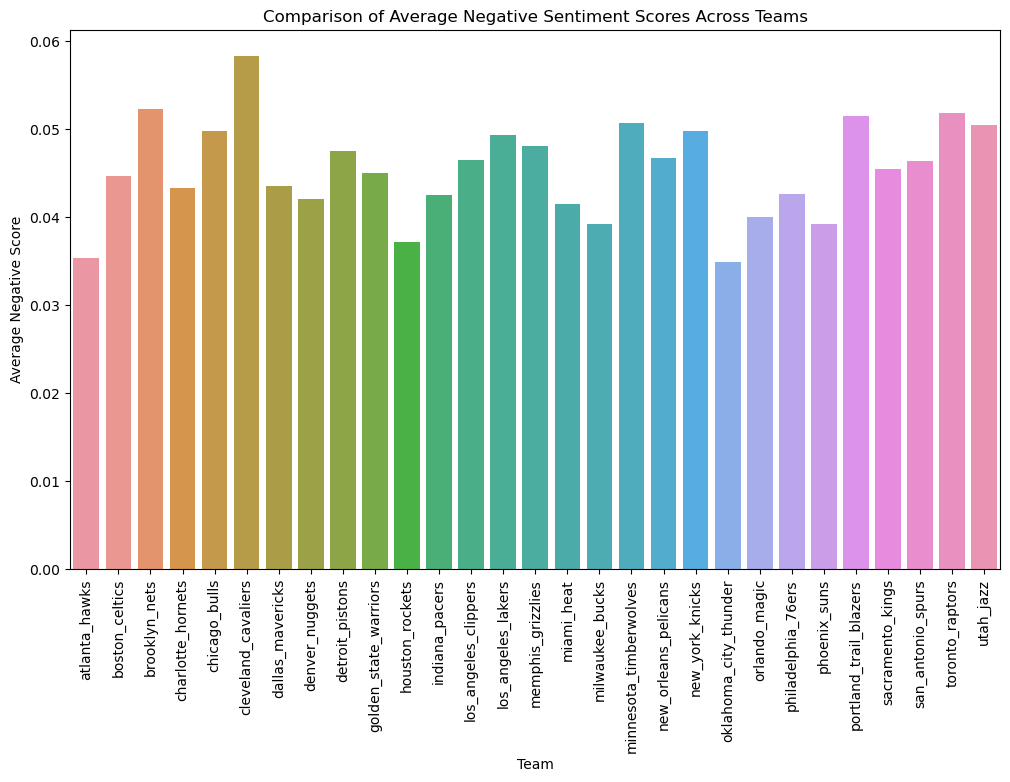

In [35]:
neg_averages = {}
for file in glob.glob(data_path):
    filename = os.path.basename(file)
    df = pd.read_csv(file)
    df = get_data(df)
    name = filename.split('_')[1:]
    name = '_'.join(name)
    name = ''.join(name.split('.csv')[0])
    neg_averages[name] = df['neg'].mean()
averages_df = pd.DataFrame(list(neg_averages.items()), columns=['Team', 'Average Neg'])
plt.figure(figsize=(12, 7))
sns.barplot(x='Team', y='Average Neg', data=averages_df)

plt.xticks(rotation=90)  # Rotate labels if there are many files
plt.title('Comparison of Average Negative Sentiment Scores Across Teams')
plt.xlabel('Team')
plt.ylabel('Average Negative Score')

plt.savefig('twitter_data/figures/average_negative_scores_across_teams.png')